In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2023-06-25 10:37:51.831586: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

11490434/11490434 [==============================] - 9s 1us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


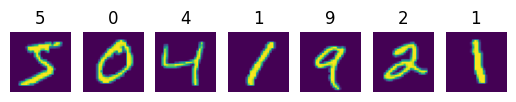

In [4]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(x_train[i])
    ax[i].set_title(y_train[i])
    ax[i].axis('off')

In [5]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [6]:
physical_devices = tf.config.list_physical_devices('GPU') 
if len(physical_devices)>0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [8]:
tf.keras.backend.clear_session()

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.layers[1].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[-0.05862563,  0.03109401,  0.0005974 , ..., -0.03226954,
          0.02292588,  0.01772064],
        [ 0.06545612, -0.05632109, -0.00088733, ...,  0.00020169,
         -0.00809464, -0.07345921],
        [ 0.03901555, -0.01244542,  0.0029657 , ...,  0.03797485,
         -0.07328883, -0.03284185],
        ...,
        [-0.01702653, -0.03966798,  0.01583415, ..., -0.03215344,
         -0.07349845,  0.01578583],
        [-0.05406232, -0.0412162 , -0.06984182, ..., -0.03695285,
         -0.04573673, -0.027317  ],
        [ 0.05967319, -0.07800849,  0.01053455, ...,  0.05979303,
         -0.0108197 , -0.00962307]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [28]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [13]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)
print("First 3 training labels:",y_train[:3])
print("One-hot-encoded version:\n",y_train_onehot[:3])

First 3 training labels: [5 0 4]
One-hot-encoded version:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [14]:
model.fit(x_train,y_train_onehot)

1875/1875 [==============================] - 6s 2ms/step - loss: 0.7771 - accuracy: 0.8195


In [15]:
hist = model.fit(x_train,
                 y_train_onehot,
                 validation_data=(x_test,y_test_onehot), 
                 epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4548 - accuracy: 0.8814 - val_loss: 0.3994 - val_accuracy: 0.8946
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4023 - accuracy: 0.8916 - val_loss: 0.3678 - val_accuracy: 0.9008
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3762 - accuracy: 0.8972 - val_loss: 0.3482 - val_accuracy: 0.9050


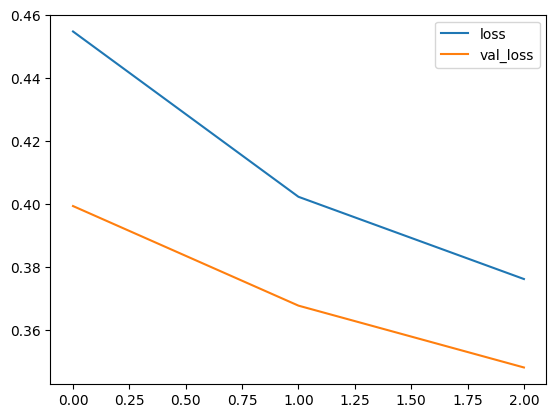

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [23]:
tf.keras.backend.clear_session()

In [32]:
model.compile(optimizer = tf.keras.optimizers.SGD(momentum = 0.5),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [33]:
# Reasons why batching is important
# Parameter update happens with each batch instead of the entire dataset
# Error is stored for each batch instead of the entire dataset - memory
hist = model.fit(x_train,
                 y_train_onehot,
                 validation_data=(x_test,y_test_onehot), 
                 epochs = 5,
                 batch_size = 64)

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.6641 - accuracy: 0.8319 - val_loss: 0.3621 - val_accuracy: 0.9015
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3430 - accuracy: 0.9046 - val_loss: 0.2993 - val_accuracy: 0.9157
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2952 - accuracy: 0.9168 - val_loss: 0.2671 - val_accuracy: 0.9244
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2657 - accuracy: 0.9256 - val_loss: 0.2454 - val_accuracy: 0.9299
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2428 - accuracy: 0.9318 - val_loss: 0.2261 - val_accuracy: 0.9377


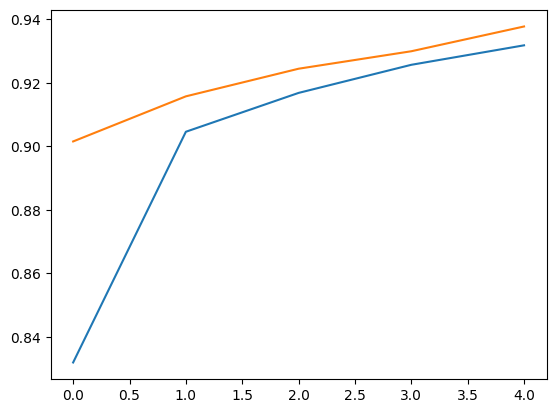

In [35]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [36]:
tf.keras.backend.clear_session()

In [39]:
# Convolutional Neural Nets
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 9,   
                                 kernel_size = (5,5),   
                                 input_shape = (28, 28, 1),
                                 activation = 'relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10))

In [41]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 9)         234       
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 10)                51850     
                                                                 
Total params: 52,084
Trainable params: 52,084
Non-trainable params: 0
_________________________________________________________________


In [43]:
x_train_c = np.expand_dims(x_train,3)
x_test_c = np.expand_dims(x_test,3)
hist = model.fit(x_train_c,y_train,validation_data=(x_test_c,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2270 - accuracy: 0.9352 - val_loss: 0.0945 - val_accuracy: 0.9730
Epoch 2/3
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0803 - accuracy: 0.9761 - val_loss: 0.0671 - val_accuracy: 0.9800
Epoch 3/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0.0682 - val_accuracy: 0.9770


In [53]:
tf.keras.backend.clear_session()

In [55]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 9, kernel_size = (5,5), input_shape = (28,28,1), activation = 'relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10))

In [60]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
metrics = ['accuracy'])

In [61]:
x_train_c = np.expand_dims(x_train,3)
x_test_c = np.expand_dims(x_test,3)

hist = model.fit(x_train_c, y_train, validation_data=(x_test_c, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 33s 17ms/step - loss: 0.8143 - accuracy: 0.7890 - val_loss: 0.3765 - val_accuracy: 0.8940
Epoch 2/3
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3623 - accuracy: 0.8953 - val_loss: 0.3205 - val_accuracy: 0.9101
Epoch 3/3
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3218 - accuracy: 0.9066 - val_loss: 0.2916 - val_accuracy: 0.9156


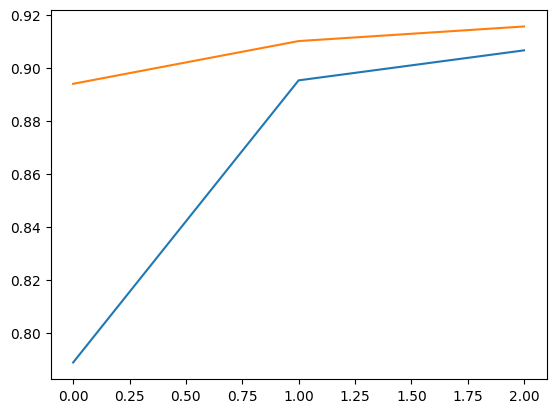

In [63]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [71]:
tf.keras.backend.clear_session()

In [72]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 6, kernel_size = (5,5), input_shape = (28, 28, 1), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation = 'relu'))
model.add(tf.keras.layers.Dense(60, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [73]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [74]:
hist = model.fit(x_train_c, y_train, validation_data=(x_test_c,y_test), epochs=3)

Epoch 1/3


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 33s 16ms/step - loss: 0.6470 - accuracy: 0.7860 - val_loss: 0.2382 - val_accuracy: 0.9292
Epoch 2/3
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2039 - accuracy: 0.9370 - val_loss: 0.1405 - val_accuracy: 0.9561
Epoch 3/3
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1388 - accuracy: 0.9559 - val_loss: 0.1106 - val_accuracy: 0.9670


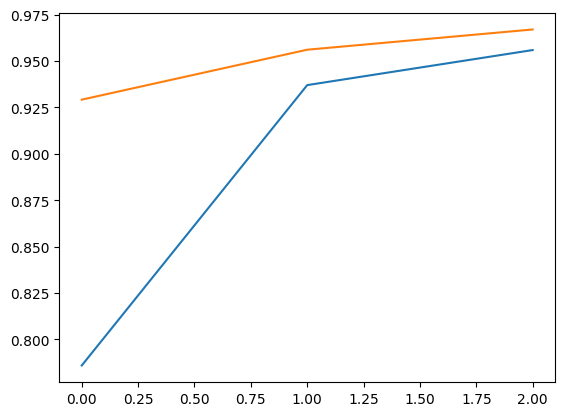

In [76]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()